In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpi4py import MPI

from lib.config import IniFile
from lib.model import Model
from lib.integrator import Integrator
from lib.sampler import Sampler
from lib.output import Output

In [2]:
def run_sim(init_file_str):
    
    ini = IniFile(init_file_str)
    
    comm = MPI.COMM_WORLD
    myModel = Model(ini, comm)
    myModel.config()
    
    myOutput = Output(ini, comm, myModel)
    myOutput.config()
    
    myIntegrator = Integrator(ini, comm, myModel, myOutput)
    myIntegrator.config()
    
    mySampler = Sampler(ini, comm, myModel, myIntegrator, myOutput)
    mySampler.config()
    
    mySampler.run() 
     
    myOutput.save()

In [3]:
run_sim('test/test1.ini')

## Output to test/test1
Time: 0. Energy served: 83.6067
Time: 0. Energy served: 83.6067
Time: 0.01. Energy served: 83.6069
Time: 0.02. Energy served: 83.6071
Time: 0.03. Energy served: 83.6074
Time: 0.04. Energy served: 83.6076
Time: 0.05. Energy served: 83.6079
Time: 0.06. Energy served: 83.6081
Time: 0.07. Energy served: 83.6084
Time: 0.08. Energy served: 83.6086
Time: 0.09. Energy served: 83.6088
Time: 0.1. Energy served: 83.6091
Time: 0.11. Energy served: 83.6093
Time: 0.12. Energy served: 83.6096
Time: 0.13. Energy served: 83.6098
Time: 0.14. Energy served: 83.6101
Time: 0.15. Energy served: 83.6103
Time: 0.16. Energy served: 83.6105
Time: 0.17. Energy served: 83.6108
Time: 0.18. Energy served: 83.611
Time: 0.19. Energy served: 83.6113
Time: 0.2. Energy served: 83.6115
Time: 0.21. Energy served: 83.6118
Time: 0.22. Energy served: 83.612
Time: 0.23. Energy served: 83.6122
Time: 0.24. Energy served: 83.6125
Time: 0.25. Energy served: 83.6127
Time: 0.26. Energy served: 83.613
Time: 0

Time: 3.14. Energy served: 83.683
Time: 3.15. Energy served: 83.6833
Time: 3.16. Energy served: 83.6835
Time: 3.17. Energy served: 83.6837
Time: 3.18. Energy served: 83.684
Time: 3.19. Energy served: 83.6842
Time: 3.2. Energy served: 83.6845
Time: 3.21. Energy served: 83.6847
Time: 3.22. Energy served: 83.685
Time: 3.23. Energy served: 83.6852
Time: 3.24. Energy served: 83.6854
Time: 3.25. Energy served: 83.6857
Time: 3.26. Energy served: 83.6859
Time: 3.27. Energy served: 83.6862
Time: 3.28. Energy served: 83.6864
Time: 3.29. Energy served: 83.6867
Time: 3.3. Energy served: 83.6869
Time: 3.31. Energy served: 83.6871
Time: 3.32. Energy served: 83.6874
Time: 3.33. Energy served: 83.6876
Time: 3.34. Energy served: 83.6879
Time: 3.35. Energy served: 83.6881
Time: 3.36. Energy served: 83.6884
Time: 3.37. Energy served: 83.6886
Time: 3.38. Energy served: 83.6889
Time: 3.39. Energy served: 83.6891
Time: 3.4. Energy served: 83.6893
Time: 3.41. Energy served: 83.6896
Time: 3.42. Energy served:

Time: 6.85. Energy served: 83.7732
Time: 6.86. Energy served: 83.7735
Time: 6.87. Energy served: 83.7737
Time: 6.88. Energy served: 83.774
Time: 6.89. Energy served: 83.7742
Time: 6.9. Energy served: 83.7745
Time: 6.91. Energy served: 83.7747
Time: 6.92. Energy served: 83.7749
Time: 6.93. Energy served: 83.7752
Time: 6.94. Energy served: 83.7754
Time: 6.95. Energy served: 83.7757
Time: 6.96. Energy served: 83.7759
Time: 6.97. Energy served: 83.7762
Time: 6.98. Energy served: 83.7764
Time: 6.99. Energy served: 83.7766
Time: 7. Energy served: 83.7769
Time: 7.01. Energy served: 83.7771
Time: 7.02. Energy served: 83.7774
Time: 7.03. Energy served: 83.7776
Time: 7.04. Energy served: 83.7779
Time: 7.05. Energy served: 83.7781
Time: 7.06. Energy served: 83.7784
Time: 7.07. Energy served: 83.7786
Time: 7.08. Energy served: 83.7788
Time: 7.09. Energy served: 83.7791
Time: 7.1. Energy served: 83.7793
Time: 7.11. Energy served: 83.7796
Time: 7.12. Energy served: 83.7798
Time: 7.13. Energy served:

Time: 10.77. Energy served: 83.8686
Time: 10.78. Energy served: 83.8688
Time: 10.79. Energy served: 83.8691
Time: 10.8. Energy served: 83.8693
Time: 10.81. Energy served: 83.8695
Time: 10.82. Energy served: 83.8698
Time: 10.83. Energy served: 83.87
Time: 10.84. Energy served: 83.8703
Time: 10.85. Energy served: 83.8705
Time: 10.86. Energy served: 83.8708
Time: 10.87. Energy served: 83.871
Time: 10.88. Energy served: 83.8713
Time: 10.89. Energy served: 83.8715
Time: 10.9. Energy served: 83.8717
Time: 10.91. Energy served: 83.872
Time: 10.92. Energy served: 83.8722
Time: 10.93. Energy served: 83.8725
Time: 10.94. Energy served: 83.8727
Time: 10.95. Energy served: 83.873
Time: 10.96. Energy served: 83.8732
Time: 10.97. Energy served: 83.8734
Time: 10.98. Energy served: 83.8737
Time: 10.99. Energy served: 83.8739
Time: 11. Energy served: 83.8742
Time: 11.01. Energy served: 83.8744
Time: 11.02. Energy served: 83.8747
Time: 11.03. Energy served: 83.8749
Time: 11.04. Energy served: 83.8751
Ti

Time: 14.47. Energy served: 83.9586
Time: 14.48. Energy served: 83.9588
Time: 14.49. Energy served: 83.959
Time: 14.5. Energy served: 83.9593
Time: 14.51. Energy served: 83.9595
Time: 14.52. Energy served: 83.9598
Time: 14.53. Energy served: 83.96
Time: 14.54. Energy served: 83.9603
Time: 14.55. Energy served: 83.9605
Time: 14.56. Energy served: 83.9607
Time: 14.57. Energy served: 83.961
Time: 14.58. Energy served: 83.9612
Time: 14.59. Energy served: 83.9615
Time: 14.6. Energy served: 83.9617
Time: 14.61. Energy served: 83.962
Time: 14.62. Energy served: 83.9622
Time: 14.63. Energy served: 83.9625
Time: 14.64. Energy served: 83.9627
Time: 14.65. Energy served: 83.9629
Time: 14.66. Energy served: 83.9632
Time: 14.67. Energy served: 83.9634
Time: 14.68. Energy served: 83.9637
Time: 14.69. Energy served: 83.9639
Time: 14.7. Energy served: 83.9642
Time: 14.71. Energy served: 83.9644
Time: 14.72. Energy served: 83.9646
Time: 14.73. Energy served: 83.9649
Time: 14.74. Energy served: 83.9651


Time: 18.22. Energy served: 84.0498
Time: 18.23. Energy served: 84.05
Time: 18.24. Energy served: 84.0502
Time: 18.25. Energy served: 84.0505
Time: 18.26. Energy served: 84.0507
Time: 18.27. Energy served: 84.051
Time: 18.28. Energy served: 84.0512
Time: 18.29. Energy served: 84.0515
Time: 18.3. Energy served: 84.0517
Time: 18.31. Energy served: 84.0519
Time: 18.32. Energy served: 84.0522
Time: 18.33. Energy served: 84.0524
Time: 18.34. Energy served: 84.0527
Time: 18.35. Energy served: 84.0529
Time: 18.36. Energy served: 84.0532
Time: 18.37. Energy served: 84.0534
Time: 18.38. Energy served: 84.0536
Time: 18.39. Energy served: 84.0539
Time: 18.4. Energy served: 84.0541
Time: 18.41. Energy served: 84.0544
Time: 18.42. Energy served: 84.0546
Time: 18.43. Energy served: 84.0549
Time: 18.44. Energy served: 84.0551
Time: 18.45. Energy served: 84.0553
Time: 18.46. Energy served: 84.0556
Time: 18.47. Energy served: 84.0558
Time: 18.48. Energy served: 84.0561
Time: 18.49. Energy served: 84.05

Time: 21.97. Energy served: 84.1409
Time: 21.98. Energy served: 84.1412
Time: 21.99. Energy served: 84.1414
Time: 22. Energy served: 84.1417
Time: 22.01. Energy served: 84.1419
Time: 22.02. Energy served: 84.1422
Time: 22.03. Energy served: 84.1424
Time: 22.04. Energy served: 84.1427
Time: 22.05. Energy served: 84.1429
Time: 22.06. Energy served: 84.1431
Time: 22.07. Energy served: 84.1434
Time: 22.08. Energy served: 84.1436
Time: 22.09. Energy served: 84.1439
Time: 22.1. Energy served: 84.1441
Time: 22.11. Energy served: 84.1444
Time: 22.12. Energy served: 84.1446
Time: 22.13. Energy served: 84.1448
Time: 22.14. Energy served: 84.1451
Time: 22.15. Energy served: 84.1453
Time: 22.16. Energy served: 84.1456
Time: 22.17. Energy served: 84.1458
Time: 22.18. Energy served: 84.1461
Time: 22.19. Energy served: 84.1463
Time: 22.2. Energy served: 84.1465
Time: 22.21. Energy served: 84.1468
Time: 22.22. Energy served: 84.147
Time: 22.23. Energy served: 84.1473
Time: 22.24. Energy served: 84.147

Time: 25.77. Energy served: 84.2334
Time: 25.78. Energy served: 84.2336
Time: 25.79. Energy served: 84.2338
Time: 25.8. Energy served: 84.2341
Time: 25.81. Energy served: 84.2343
Time: 25.82. Energy served: 84.2346
Time: 25.83. Energy served: 84.2348
Time: 25.84. Energy served: 84.2351
Time: 25.85. Energy served: 84.2353
Time: 25.86. Energy served: 84.2355
Time: 25.87. Energy served: 84.2358
Time: 25.88. Energy served: 84.236
Time: 25.89. Energy served: 84.2363
Time: 25.9. Energy served: 84.2365
Time: 25.91. Energy served: 84.2368
Time: 25.92. Energy served: 84.237
Time: 25.93. Energy served: 84.2372
Time: 25.94. Energy served: 84.2375
Time: 25.95. Energy served: 84.2377
Time: 25.96. Energy served: 84.238
Time: 25.97. Energy served: 84.2382
Time: 25.98. Energy served: 84.2385
Time: 25.99. Energy served: 84.2387
Time: 26. Energy served: 84.239
Time: 26.01. Energy served: 84.2392
Time: 26.02. Energy served: 84.2394
Time: 26.03. Energy served: 84.2397
Time: 26.04. Energy served: 84.2399
T

Time: 29.51. Energy served: 84.3243
Time: 29.52. Energy served: 84.3245
Time: 29.53. Energy served: 84.3248
Time: 29.54. Energy served: 84.325
Time: 29.55. Energy served: 84.3253
Time: 29.56. Energy served: 84.3255
Time: 29.57. Energy served: 84.3258
Time: 29.58. Energy served: 84.326
Time: 29.59. Energy served: 84.3262
Time: 29.6. Energy served: 84.3265
Time: 29.61. Energy served: 84.3267
Time: 29.62. Energy served: 84.327
Time: 29.63. Energy served: 84.3272
Time: 29.64. Energy served: 84.3275
Time: 29.65. Energy served: 84.3277
Time: 29.66. Energy served: 84.328
Time: 29.67. Energy served: 84.3282
Time: 29.68. Energy served: 84.3284
Time: 29.69. Energy served: 84.3287
Time: 29.7. Energy served: 84.3289
Time: 29.71. Energy served: 84.3292
Time: 29.72. Energy served: 84.3294
Time: 29.73. Energy served: 84.3297
Time: 29.74. Energy served: 84.3299
Time: 29.75. Energy served: 84.3301
Time: 29.76. Energy served: 84.3304
Time: 29.77. Energy served: 84.3306
Time: 29.78. Energy served: 84.330

Time: 33.42. Energy served: 84.4194
Time: 33.43. Energy served: 84.4196
Time: 33.44. Energy served: 84.4199
Time: 33.45. Energy served: 84.4201
Time: 33.46. Energy served: 84.4204
Time: 33.47. Energy served: 84.4206
Time: 33.48. Energy served: 84.4208
Time: 33.49. Energy served: 84.4211
Time: 33.5. Energy served: 84.4213
Time: 33.51. Energy served: 84.4216
Time: 33.52. Energy served: 84.4218
Time: 33.53. Energy served: 84.4221
Time: 33.54. Energy served: 84.4223
Time: 33.55. Energy served: 84.4225
Time: 33.56. Energy served: 84.4228
Time: 33.57. Energy served: 84.423
Time: 33.58. Energy served: 84.4233
Time: 33.59. Energy served: 84.4235
Time: 33.6. Energy served: 84.4238
Time: 33.61. Energy served: 84.424
Time: 33.62. Energy served: 84.4242
Time: 33.63. Energy served: 84.4245
Time: 33.64. Energy served: 84.4247
Time: 33.65. Energy served: 84.425
Time: 33.66. Energy served: 84.4252
Time: 33.67. Energy served: 84.4255
Time: 33.68. Energy served: 84.4257
Time: 33.69. Energy served: 84.42

Time: 37.29. Energy served: 84.5135
Time: 37.3. Energy served: 84.5137
Time: 37.31. Energy served: 84.514
Time: 37.32. Energy served: 84.5142
Time: 37.33. Energy served: 84.5145
Time: 37.34. Energy served: 84.5147
Time: 37.35. Energy served: 84.5149
Time: 37.36. Energy served: 84.5152
Time: 37.37. Energy served: 84.5154
Time: 37.38. Energy served: 84.5157
Time: 37.39. Energy served: 84.5159
Time: 37.4. Energy served: 84.5162
Time: 37.41. Energy served: 84.5164
Time: 37.42. Energy served: 84.5166
Time: 37.43. Energy served: 84.5169
Time: 37.44. Energy served: 84.5171
Time: 37.45. Energy served: 84.5174
Time: 37.46. Energy served: 84.5176
Time: 37.47. Energy served: 84.5179
Time: 37.48. Energy served: 84.5181
Time: 37.49. Energy served: 84.5183
Time: 37.5. Energy served: 84.5186
Time: 37.51. Energy served: 84.5188
Time: 37.52. Energy served: 84.5191
Time: 37.53. Energy served: 84.5193
Time: 37.54. Energy served: 84.5196
Time: 37.55. Energy served: 84.5198
Time: 37.56. Energy served: 84.5

Time: 41.08. Energy served: 84.6056
Time: 41.09. Energy served: 84.6059
Time: 41.1. Energy served: 84.6061
Time: 41.11. Energy served: 84.6064
Time: 41.12. Energy served: 84.6066
Time: 41.13. Energy served: 84.6068
Time: 41.14. Energy served: 84.6071
Time: 41.15. Energy served: 84.6073
Time: 41.16. Energy served: 84.6076
Time: 41.17. Energy served: 84.6078
Time: 41.18. Energy served: 84.6081
Time: 41.19. Energy served: 84.6083
Time: 41.2. Energy served: 84.6085
Time: 41.21. Energy served: 84.6088
Time: 41.22. Energy served: 84.609
Time: 41.23. Energy served: 84.6093
Time: 41.24. Energy served: 84.6095
Time: 41.25. Energy served: 84.6098
Time: 41.26. Energy served: 84.61
Time: 41.27. Energy served: 84.6102
Time: 41.28. Energy served: 84.6105
Time: 41.29. Energy served: 84.6107
Time: 41.3. Energy served: 84.611
Time: 41.31. Energy served: 84.6112
Time: 41.32. Energy served: 84.6115
Time: 41.33. Energy served: 84.6117
Time: 41.34. Energy served: 84.6119
Time: 41.35. Energy served: 84.6122

Time: 44.84. Energy served: 84.697
Time: 44.85. Energy served: 84.6973
Time: 44.86. Energy served: 84.6975
Time: 44.87. Energy served: 84.6978
Time: 44.88. Energy served: 84.698
Time: 44.89. Energy served: 84.6983
Time: 44.9. Energy served: 84.6985
Time: 44.91. Energy served: 84.6987
Time: 44.92. Energy served: 84.699
Time: 44.93. Energy served: 84.6992
Time: 44.94. Energy served: 84.6995
Time: 44.95. Energy served: 84.6997
Time: 44.96. Energy served: 84.7
Time: 44.97. Energy served: 84.7002
Time: 44.98. Energy served: 84.7004
Time: 44.99. Energy served: 84.7007
Time: 45. Energy served: 84.7009
Time: 45.01. Energy served: 84.7012
Time: 45.02. Energy served: 84.7014
Time: 45.03. Energy served: 84.7017
Time: 45.04. Energy served: 84.7019
Time: 45.05. Energy served: 84.7021
Time: 45.06. Energy served: 84.7024
Time: 45.07. Energy served: 84.7026
Time: 45.08. Energy served: 84.7029
Time: 45.09. Energy served: 84.7031
Time: 45.1. Energy served: 84.7034
Time: 45.11. Energy served: 84.7036
Tim

Time: 48.55. Energy served: 84.7872
Time: 48.56. Energy served: 84.7875
Time: 48.57. Energy served: 84.7877
Time: 48.58. Energy served: 84.788
Time: 48.59. Energy served: 84.7882
Time: 48.6. Energy served: 84.7885
Time: 48.61. Energy served: 84.7887
Time: 48.62. Energy served: 84.7889
Time: 48.63. Energy served: 84.7892
Time: 48.64. Energy served: 84.7894
Time: 48.65. Energy served: 84.7897
Time: 48.66. Energy served: 84.7899
Time: 48.67. Energy served: 84.7902
Time: 48.68. Energy served: 84.7904
Time: 48.69. Energy served: 84.7906
Time: 48.7. Energy served: 84.7909
Time: 48.71. Energy served: 84.7911
Time: 48.72. Energy served: 84.7914
Time: 48.73. Energy served: 84.7916
Time: 48.74. Energy served: 84.7919
Time: 48.75. Energy served: 84.7921
Time: 48.76. Energy served: 84.7923
Time: 48.77. Energy served: 84.7926
Time: 48.78. Energy served: 84.7928
Time: 48.79. Energy served: 84.7931
Time: 48.8. Energy served: 84.7933
Time: 48.81. Energy served: 84.7936
Time: 48.82. Energy served: 84.7

Time: 52.52. Energy served: 84.8837
Time: 52.53. Energy served: 84.884
Time: 52.54. Energy served: 84.8842
Time: 52.55. Energy served: 84.8845
Time: 52.56. Energy served: 84.8847
Time: 52.57. Energy served: 84.885
Time: 52.58. Energy served: 84.8852
Time: 52.59. Energy served: 84.8854
Time: 52.6. Energy served: 84.8857
Time: 52.61. Energy served: 84.8859
Time: 52.62. Energy served: 84.8862
Time: 52.63. Energy served: 84.8864
Time: 52.64. Energy served: 84.8867
Time: 52.65. Energy served: 84.8869
Time: 52.66. Energy served: 84.8872
Time: 52.67. Energy served: 84.8874
Time: 52.68. Energy served: 84.8876
Time: 52.69. Energy served: 84.8879
Time: 52.7. Energy served: 84.8881
Time: 52.71. Energy served: 84.8884
Time: 52.72. Energy served: 84.8886
Time: 52.73. Energy served: 84.8889
Time: 52.74. Energy served: 84.8891
Time: 52.75. Energy served: 84.8893
Time: 52.76. Energy served: 84.8896
Time: 52.77. Energy served: 84.8898
Time: 52.78. Energy served: 84.8901
Time: 52.79. Energy served: 84.8

Time: 56.4. Energy served: 84.9781
Time: 56.41. Energy served: 84.9783
Time: 56.42. Energy served: 84.9785
Time: 56.43. Energy served: 84.9788
Time: 56.44. Energy served: 84.979
Time: 56.45. Energy served: 84.9793
Time: 56.46. Energy served: 84.9795
Time: 56.47. Energy served: 84.9798
Time: 56.48. Energy served: 84.98
Time: 56.49. Energy served: 84.9803
Time: 56.5. Energy served: 84.9805
Time: 56.51. Energy served: 84.9807
Time: 56.52. Energy served: 84.981
Time: 56.53. Energy served: 84.9812
Time: 56.54. Energy served: 84.9815
Time: 56.55. Energy served: 84.9817
Time: 56.56. Energy served: 84.982
Time: 56.57. Energy served: 84.9822
Time: 56.58. Energy served: 84.9824
Time: 56.59. Energy served: 84.9827
Time: 56.6. Energy served: 84.9829
Time: 56.61. Energy served: 84.9832
Time: 56.62. Energy served: 84.9834
Time: 56.63. Energy served: 84.9837
Time: 56.64. Energy served: 84.9839
Time: 56.65. Energy served: 84.9841
Time: 56.66. Energy served: 84.9844
Time: 56.67. Energy served: 84.9846


Time: 60.29. Energy served: 85.0726
Time: 60.3. Energy served: 85.0729
Time: 60.31. Energy served: 85.0731
Time: 60.32. Energy served: 85.0733
Time: 60.33. Energy served: 85.0736
Time: 60.34. Energy served: 85.0738
Time: 60.35. Energy served: 85.0741
Time: 60.36. Energy served: 85.0743
Time: 60.37. Energy served: 85.0746
Time: 60.38. Energy served: 85.0748
Time: 60.39. Energy served: 85.075
Time: 60.4. Energy served: 85.0753
Time: 60.41. Energy served: 85.0755
Time: 60.42. Energy served: 85.0758
Time: 60.43. Energy served: 85.076
Time: 60.44. Energy served: 85.0763
Time: 60.45. Energy served: 85.0765
Time: 60.46. Energy served: 85.0767
Time: 60.47. Energy served: 85.077
Time: 60.48. Energy served: 85.0772
Time: 60.49. Energy served: 85.0775
Time: 60.5. Energy served: 85.0777
Time: 60.51. Energy served: 85.078
Time: 60.52. Energy served: 85.0782
Time: 60.53. Energy served: 85.0784
Time: 60.54. Energy served: 85.0787
Time: 60.55. Energy served: 85.0789
Time: 60.56. Energy served: 85.0792

Time: 64.06. Energy served: 85.1642
Time: 64.07. Energy served: 85.1645
Time: 64.08. Energy served: 85.1647
Time: 64.09. Energy served: 85.165
Time: 64.1. Energy served: 85.1652
Time: 64.11. Energy served: 85.1655
Time: 64.12. Energy served: 85.1657
Time: 64.13. Energy served: 85.1659
Time: 64.14. Energy served: 85.1662
Time: 64.15. Energy served: 85.1664
Time: 64.16. Energy served: 85.1667
Time: 64.17. Energy served: 85.1669
Time: 64.18. Energy served: 85.1672
Time: 64.19. Energy served: 85.1674
Time: 64.2. Energy served: 85.1676
Time: 64.21. Energy served: 85.1679
Time: 64.22. Energy served: 85.1681
Time: 64.23. Energy served: 85.1684
Time: 64.24. Energy served: 85.1686
Time: 64.25. Energy served: 85.1689
Time: 64.26. Energy served: 85.1691
Time: 64.27. Energy served: 85.1693
Time: 64.28. Energy served: 85.1696
Time: 64.29. Energy served: 85.1698
Time: 64.3. Energy served: 85.1701
Time: 64.31. Energy served: 85.1703
Time: 64.32. Energy served: 85.1706
Time: 64.33. Energy served: 85.1

Time: 67.74. Energy served: 85.2537
Time: 67.75. Energy served: 85.2539
Time: 67.76. Energy served: 85.2542
Time: 67.77. Energy served: 85.2544
Time: 67.78. Energy served: 85.2546
Time: 67.79. Energy served: 85.2549
Time: 67.8. Energy served: 85.2551
Time: 67.81. Energy served: 85.2554
Time: 67.82. Energy served: 85.2556
Time: 67.83. Energy served: 85.2559
Time: 67.84. Energy served: 85.2561
Time: 67.85. Energy served: 85.2563
Time: 67.86. Energy served: 85.2566
Time: 67.87. Energy served: 85.2568
Time: 67.88. Energy served: 85.2571
Time: 67.89. Energy served: 85.2573
Time: 67.9. Energy served: 85.2576
Time: 67.91. Energy served: 85.2578
Time: 67.92. Energy served: 85.258
Time: 67.93. Energy served: 85.2583
Time: 67.94. Energy served: 85.2585
Time: 67.95. Energy served: 85.2588
Time: 67.96. Energy served: 85.259
Time: 67.97. Energy served: 85.2593
Time: 67.98. Energy served: 85.2595
Time: 67.99. Energy served: 85.2597
Time: 68. Energy served: 85.26
Time: 68.01. Energy served: 85.2602
T

Time: 71.43. Energy served: 85.3433
Time: 71.44. Energy served: 85.3436
Time: 71.45. Energy served: 85.3438
Time: 71.46. Energy served: 85.3441
Time: 71.47. Energy served: 85.3443
Time: 71.48. Energy served: 85.3446
Time: 71.49. Energy served: 85.3448
Time: 71.5. Energy served: 85.345
Time: 71.51. Energy served: 85.3453
Time: 71.52. Energy served: 85.3455
Time: 71.53. Energy served: 85.3458
Time: 71.54. Energy served: 85.346
Time: 71.55. Energy served: 85.3463
Time: 71.56. Energy served: 85.3465
Time: 71.57. Energy served: 85.3467
Time: 71.58. Energy served: 85.347
Time: 71.59. Energy served: 85.3472
Time: 71.6. Energy served: 85.3475
Time: 71.61. Energy served: 85.3477
Time: 71.62. Energy served: 85.348
Time: 71.63. Energy served: 85.3482
Time: 71.64. Energy served: 85.3484
Time: 71.65. Energy served: 85.3487
Time: 71.66. Energy served: 85.3489
Time: 71.67. Energy served: 85.3492
Time: 71.68. Energy served: 85.3494
Time: 71.69. Energy served: 85.3497
Time: 71.7. Energy served: 85.3499

Time: 75.23. Energy served: 85.4357
Time: 75.24. Energy served: 85.4359
Time: 75.25. Energy served: 85.4362
Time: 75.26. Energy served: 85.4364
Time: 75.27. Energy served: 85.4366
Time: 75.28. Energy served: 85.4369
Time: 75.29. Energy served: 85.4371
Time: 75.3. Energy served: 85.4374
Time: 75.31. Energy served: 85.4376
Time: 75.32. Energy served: 85.4379
Time: 75.33. Energy served: 85.4381
Time: 75.34. Energy served: 85.4383
Time: 75.35. Energy served: 85.4386
Time: 75.36. Energy served: 85.4388
Time: 75.37. Energy served: 85.4391
Time: 75.38. Energy served: 85.4393
Time: 75.39. Energy served: 85.4396
Time: 75.4. Energy served: 85.4398
Time: 75.41. Energy served: 85.44
Time: 75.42. Energy served: 85.4403
Time: 75.43. Energy served: 85.4405
Time: 75.44. Energy served: 85.4408
Time: 75.45. Energy served: 85.441
Time: 75.46. Energy served: 85.4413
Time: 75.47. Energy served: 85.4415
Time: 75.48. Energy served: 85.4417
Time: 75.49. Energy served: 85.442
Time: 75.5. Energy served: 85.4422

Time: 79.05. Energy served: 85.5285
Time: 79.06. Energy served: 85.5287
Time: 79.07. Energy served: 85.529
Time: 79.08. Energy served: 85.5292
Time: 79.09. Energy served: 85.5295
Time: 79.1. Energy served: 85.5297
Time: 79.11. Energy served: 85.5299
Time: 79.12. Energy served: 85.5302
Time: 79.13. Energy served: 85.5304
Time: 79.14. Energy served: 85.5307
Time: 79.15. Energy served: 85.5309
Time: 79.16. Energy served: 85.5312
Time: 79.17. Energy served: 85.5314
Time: 79.18. Energy served: 85.5316
Time: 79.19. Energy served: 85.5319
Time: 79.2. Energy served: 85.5321
Time: 79.21. Energy served: 85.5324
Time: 79.22. Energy served: 85.5326
Time: 79.23. Energy served: 85.5329
Time: 79.24. Energy served: 85.5331
Time: 79.25. Energy served: 85.5333
Time: 79.26. Energy served: 85.5336
Time: 79.27. Energy served: 85.5338
Time: 79.28. Energy served: 85.5341
Time: 79.29. Energy served: 85.5343
Time: 79.3. Energy served: 85.5346
Time: 79.31. Energy served: 85.5348
Time: 79.32. Energy served: 85.5

Time: 82.77. Energy served: 85.6189
Time: 82.78. Energy served: 85.6191
Time: 82.79. Energy served: 85.6193
Time: 82.8. Energy served: 85.6196
Time: 82.81. Energy served: 85.6198
Time: 82.82. Energy served: 85.6201
Time: 82.83. Energy served: 85.6203
Time: 82.84. Energy served: 85.6206
Time: 82.85. Energy served: 85.6208
Time: 82.86. Energy served: 85.621
Time: 82.87. Energy served: 85.6213
Time: 82.88. Energy served: 85.6215
Time: 82.89. Energy served: 85.6218
Time: 82.9. Energy served: 85.622
Time: 82.91. Energy served: 85.6223
Time: 82.92. Energy served: 85.6225
Time: 82.93. Energy served: 85.6227
Time: 82.94. Energy served: 85.623
Time: 82.95. Energy served: 85.6232
Time: 82.96. Energy served: 85.6235
Time: 82.97. Energy served: 85.6237
Time: 82.98. Energy served: 85.624
Time: 82.99. Energy served: 85.6242
Time: 83. Energy served: 85.6244
Time: 83.01. Energy served: 85.6247
Time: 83.02. Energy served: 85.6249
Time: 83.03. Energy served: 85.6252
Time: 83.04. Energy served: 85.6254
T

Time: 86.61. Energy served: 85.7121
Time: 86.62. Energy served: 85.7124
Time: 86.63. Energy served: 85.7126
Time: 86.64. Energy served: 85.7129
Time: 86.65. Energy served: 85.7131
Time: 86.66. Energy served: 85.7133
Time: 86.67. Energy served: 85.7136
Time: 86.68. Energy served: 85.7138
Time: 86.69. Energy served: 85.7141
Time: 86.7. Energy served: 85.7143
Time: 86.71. Energy served: 85.7146
Time: 86.72. Energy served: 85.7148
Time: 86.73. Energy served: 85.715
Time: 86.74. Energy served: 85.7153
Time: 86.75. Energy served: 85.7155
Time: 86.76. Energy served: 85.7158
Time: 86.77. Energy served: 85.716
Time: 86.78. Energy served: 85.7163
Time: 86.79. Energy served: 85.7165
Time: 86.8. Energy served: 85.7167
Time: 86.81. Energy served: 85.717
Time: 86.82. Energy served: 85.7172
Time: 86.83. Energy served: 85.7175
Time: 86.84. Energy served: 85.7177
Time: 86.85. Energy served: 85.718
Time: 86.86. Energy served: 85.7182
Time: 86.87. Energy served: 85.7184
Time: 86.88. Energy served: 85.718

Time: 90.3. Energy served: 85.8018
Time: 90.31. Energy served: 85.802
Time: 90.32. Energy served: 85.8022
Time: 90.33. Energy served: 85.8025
Time: 90.34. Energy served: 85.8027
Time: 90.35. Energy served: 85.803
Time: 90.36. Energy served: 85.8032
Time: 90.37. Energy served: 85.8035
Time: 90.38. Energy served: 85.8037
Time: 90.39. Energy served: 85.8039
Time: 90.4. Energy served: 85.8042
Time: 90.41. Energy served: 85.8044
Time: 90.42. Energy served: 85.8047
Time: 90.43. Energy served: 85.8049
Time: 90.44. Energy served: 85.8052
Time: 90.45. Energy served: 85.8054
Time: 90.46. Energy served: 85.8056
Time: 90.47. Energy served: 85.8059
Time: 90.48. Energy served: 85.8061
Time: 90.49. Energy served: 85.8064
Time: 90.5. Energy served: 85.8066
Time: 90.51. Energy served: 85.8069
Time: 90.52. Energy served: 85.8071
Time: 90.53. Energy served: 85.8073
Time: 90.54. Energy served: 85.8076
Time: 90.55. Energy served: 85.8078
Time: 90.56. Energy served: 85.8081
Time: 90.57. Energy served: 85.80

Time: 94.06. Energy served: 85.8931
Time: 94.07. Energy served: 85.8933
Time: 94.08. Energy served: 85.8936
Time: 94.09. Energy served: 85.8938
Time: 94.1. Energy served: 85.894
Time: 94.11. Energy served: 85.8943
Time: 94.12. Energy served: 85.8945
Time: 94.13. Energy served: 85.8948
Time: 94.14. Energy served: 85.895
Time: 94.15. Energy served: 85.8953
Time: 94.16. Energy served: 85.8955
Time: 94.17. Energy served: 85.8957
Time: 94.18. Energy served: 85.896
Time: 94.19. Energy served: 85.8962
Time: 94.2. Energy served: 85.8965
Time: 94.21. Energy served: 85.8967
Time: 94.22. Energy served: 85.897
Time: 94.23. Energy served: 85.8972
Time: 94.24. Energy served: 85.8974
Time: 94.25. Energy served: 85.8977
Time: 94.26. Energy served: 85.8979
Time: 94.27. Energy served: 85.8982
Time: 94.28. Energy served: 85.8984
Time: 94.29. Energy served: 85.8987
Time: 94.3. Energy served: 85.8989
Time: 94.31. Energy served: 85.8991
Time: 94.32. Energy served: 85.8994
Time: 94.33. Energy served: 85.8996

Time: 97.83. Energy served: 85.9846
Time: 97.84. Energy served: 85.9849
Time: 97.85. Energy served: 85.9851
Time: 97.86. Energy served: 85.9853
Time: 97.87. Energy served: 85.9856
Time: 97.88. Energy served: 85.9858
Time: 97.89. Energy served: 85.9861
Time: 97.9. Energy served: 85.9863
Time: 97.91. Energy served: 85.9866
Time: 97.92. Energy served: 85.9868
Time: 97.93. Energy served: 85.987
Time: 97.94. Energy served: 85.9873
Time: 97.95. Energy served: 85.9875
Time: 97.96. Energy served: 85.9878
Time: 97.97. Energy served: 85.988
Time: 97.98. Energy served: 85.9883
Time: 97.99. Energy served: 85.9885
Time: 98. Energy served: 85.9887
Time: 98.01. Energy served: 85.989
Time: 98.02. Energy served: 85.9892
Time: 98.03. Energy served: 85.9895
Time: 98.04. Energy served: 85.9897
Time: 98.05. Energy served: 85.99
Time: 98.06. Energy served: 85.9902
Time: 98.07. Energy served: 85.9904
Time: 98.08. Energy served: 85.9907
Time: 98.09. Energy served: 85.9909
Time: 98.1. Energy served: 85.9912
Ti

Time: 101.08. Energy served: 86.0635
Time: 101.09. Energy served: 86.0638
Time: 101.1. Energy served: 86.064
Time: 101.11. Energy served: 86.0642
Time: 101.12. Energy served: 86.0645
Time: 101.13. Energy served: 86.0647
Time: 101.14. Energy served: 86.065
Time: 101.15. Energy served: 86.0652
Time: 101.16. Energy served: 86.0655
Time: 101.17. Energy served: 86.0657
Time: 101.18. Energy served: 86.0659
Time: 101.19. Energy served: 86.0662
Time: 101.2. Energy served: 86.0664
Time: 101.21. Energy served: 86.0667
Time: 101.22. Energy served: 86.0669
Time: 101.23. Energy served: 86.0672
Time: 101.24. Energy served: 86.0674
Time: 101.25. Energy served: 86.0676
Time: 101.26. Energy served: 86.0679
Time: 101.27. Energy served: 86.0681
Time: 101.28. Energy served: 86.0684
Time: 101.29. Energy served: 86.0686
Time: 101.3. Energy served: 86.0689
Time: 101.31. Energy served: 86.0691
Time: 101.32. Energy served: 86.0693
Time: 101.33. Energy served: 86.0696
Time: 101.34. Energy served: 86.0698
Time: 

Time: 104.79. Energy served: 86.1536
Time: 104.8. Energy served: 86.1538
Time: 104.81. Energy served: 86.1541
Time: 104.82. Energy served: 86.1543
Time: 104.83. Energy served: 86.1546
Time: 104.84. Energy served: 86.1548
Time: 104.85. Energy served: 86.155
Time: 104.86. Energy served: 86.1553
Time: 104.87. Energy served: 86.1555
Time: 104.88. Energy served: 86.1558
Time: 104.89. Energy served: 86.156
Time: 104.9. Energy served: 86.1563
Time: 104.91. Energy served: 86.1565
Time: 104.92. Energy served: 86.1567
Time: 104.93. Energy served: 86.157
Time: 104.94. Energy served: 86.1572
Time: 104.95. Energy served: 86.1575
Time: 104.96. Energy served: 86.1577
Time: 104.97. Energy served: 86.158
Time: 104.98. Energy served: 86.1582
Time: 104.99. Energy served: 86.1584
Time: 105. Energy served: 86.1587
Time: 105.01. Energy served: 86.1589
Time: 105.02. Energy served: 86.1592
Time: 105.03. Energy served: 86.1594
Time: 105.04. Energy served: 86.1597
Time: 105.05. Energy served: 86.1599
Time: 105.

Time: 108.54. Energy served: 86.2446
Time: 108.55. Energy served: 86.2449
Time: 108.56. Energy served: 86.2451
Time: 108.57. Energy served: 86.2453
Time: 108.58. Energy served: 86.2456
Time: 108.59. Energy served: 86.2458
Time: 108.6. Energy served: 86.2461
Time: 108.61. Energy served: 86.2463
Time: 108.62. Energy served: 86.2466
Time: 108.63. Energy served: 86.2468
Time: 108.64. Energy served: 86.247
Time: 108.65. Energy served: 86.2473
Time: 108.66. Energy served: 86.2475
Time: 108.67. Energy served: 86.2478
Time: 108.68. Energy served: 86.248
Time: 108.69. Energy served: 86.2483
Time: 108.7. Energy served: 86.2485
Time: 108.71. Energy served: 86.2487
Time: 108.72. Energy served: 86.249
Time: 108.73. Energy served: 86.2492
Time: 108.74. Energy served: 86.2495
Time: 108.75. Energy served: 86.2497
Time: 108.76. Energy served: 86.2499
Time: 108.77. Energy served: 86.2502
Time: 108.78. Energy served: 86.2504
Time: 108.79. Energy served: 86.2507
Time: 108.8. Energy served: 86.2509
Time: 1

Time: 112.3. Energy served: 86.3359
Time: 112.31. Energy served: 86.3361
Time: 112.32. Energy served: 86.3363
Time: 112.33. Energy served: 86.3366
Time: 112.34. Energy served: 86.3368
Time: 112.35. Energy served: 86.3371
Time: 112.36. Energy served: 86.3373
Time: 112.37. Energy served: 86.3376
Time: 112.38. Energy served: 86.3378
Time: 112.39. Energy served: 86.338
Time: 112.4. Energy served: 86.3383
Time: 112.41. Energy served: 86.3385
Time: 112.42. Energy served: 86.3388
Time: 112.43. Energy served: 86.339
Time: 112.44. Energy served: 86.3393
Time: 112.45. Energy served: 86.3395
Time: 112.46. Energy served: 86.3397
Time: 112.47. Energy served: 86.34
Time: 112.48. Energy served: 86.3402
Time: 112.49. Energy served: 86.3405
Time: 112.5. Energy served: 86.3407
Time: 112.51. Energy served: 86.341
Time: 112.52. Energy served: 86.3412
Time: 112.53. Energy served: 86.3414
Time: 112.54. Energy served: 86.3417
Time: 112.55. Energy served: 86.3419
Time: 112.56. Energy served: 86.3422
Time: 112

Time: 116.13. Energy served: 86.4288
Time: 116.14. Energy served: 86.429
Time: 116.15. Energy served: 86.4293
Time: 116.16. Energy served: 86.4295
Time: 116.17. Energy served: 86.4298
Time: 116.18. Energy served: 86.43
Time: 116.19. Energy served: 86.4303
Time: 116.2. Energy served: 86.4305
Time: 116.21. Energy served: 86.4307
Time: 116.22. Energy served: 86.431
Time: 116.23. Energy served: 86.4312
Time: 116.24. Energy served: 86.4315
Time: 116.25. Energy served: 86.4317
Time: 116.26. Energy served: 86.432
Time: 116.27. Energy served: 86.4322
Time: 116.28. Energy served: 86.4324
Time: 116.29. Energy served: 86.4327
Time: 116.3. Energy served: 86.4329
Time: 116.31. Energy served: 86.4332
Time: 116.32. Energy served: 86.4334
Time: 116.33. Energy served: 86.4337
Time: 116.34. Energy served: 86.4339
Time: 116.35. Energy served: 86.4341
Time: 116.36. Energy served: 86.4344
Time: 116.37. Energy served: 86.4346
Time: 116.38. Energy served: 86.4349
Time: 116.39. Energy served: 86.4351
Time: 11

Time: 119.81. Energy served: 86.5181
Time: 119.82. Energy served: 86.5183
Time: 119.83. Energy served: 86.5186
Time: 119.84. Energy served: 86.5188
Time: 119.85. Energy served: 86.5191
Time: 119.86. Energy served: 86.5193
Time: 119.87. Energy served: 86.5195
Time: 119.88. Energy served: 86.5198
Time: 119.89. Energy served: 86.52
Time: 119.9. Energy served: 86.5203
Time: 119.91. Energy served: 86.5205
Time: 119.92. Energy served: 86.5208
Time: 119.93. Energy served: 86.521
Time: 119.94. Energy served: 86.5212
Time: 119.95. Energy served: 86.5215
Time: 119.96. Energy served: 86.5217
Time: 119.97. Energy served: 86.522
Time: 119.98. Energy served: 86.5222
Time: 119.99. Energy served: 86.5225
Time: 120. Energy served: 86.5227
Time: 120.01. Energy served: 86.5229
Time: 120.02. Energy served: 86.5232
Time: 120.03. Energy served: 86.5234
Time: 120.04. Energy served: 86.5237
Time: 120.05. Energy served: 86.5239
Time: 120.06. Energy served: 86.5242
Time: 120.07. Energy served: 86.5244
Time: 120

Time: 123.54. Energy served: 86.6086
Time: 123.55. Energy served: 86.6088
Time: 123.56. Energy served: 86.6091
Time: 123.57. Energy served: 86.6093
Time: 123.58. Energy served: 86.6096
Time: 123.59. Energy served: 86.6098
Time: 123.6. Energy served: 86.61
Time: 123.61. Energy served: 86.6103
Time: 123.62. Energy served: 86.6105
Time: 123.63. Energy served: 86.6108
Time: 123.64. Energy served: 86.611
Time: 123.65. Energy served: 86.6112
Time: 123.66. Energy served: 86.6115
Time: 123.67. Energy served: 86.6117
Time: 123.68. Energy served: 86.612
Time: 123.69. Energy served: 86.6122
Time: 123.7. Energy served: 86.6125
Time: 123.71. Energy served: 86.6127
Time: 123.72. Energy served: 86.6129
Time: 123.73. Energy served: 86.6132
Time: 123.74. Energy served: 86.6134
Time: 123.75. Energy served: 86.6137
Time: 123.76. Energy served: 86.6139
Time: 123.77. Energy served: 86.6142
Time: 123.78. Energy served: 86.6144
Time: 123.79. Energy served: 86.6146
Time: 123.8. Energy served: 86.6149
Time: 12

Time: 127.24. Energy served: 86.6983
Time: 127.25. Energy served: 86.6986
Time: 127.26. Energy served: 86.6988
Time: 127.27. Energy served: 86.6991
Time: 127.28. Energy served: 86.6993
Time: 127.29. Energy served: 86.6995
Time: 127.3. Energy served: 86.6998
Time: 127.31. Energy served: 86.7
Time: 127.32. Energy served: 86.7003
Time: 127.33. Energy served: 86.7005
Time: 127.34. Energy served: 86.7008
Time: 127.35. Energy served: 86.701
Time: 127.36. Energy served: 86.7012
Time: 127.37. Energy served: 86.7015
Time: 127.38. Energy served: 86.7017
Time: 127.39. Energy served: 86.702
Time: 127.4. Energy served: 86.7022
Time: 127.41. Energy served: 86.7024
Time: 127.42. Energy served: 86.7027
Time: 127.43. Energy served: 86.7029
Time: 127.44. Energy served: 86.7032
Time: 127.45. Energy served: 86.7034
Time: 127.46. Energy served: 86.7037
Time: 127.47. Energy served: 86.7039
Time: 127.48. Energy served: 86.7041
Time: 127.49. Energy served: 86.7044
Time: 127.5. Energy served: 86.7046
Time: 127

Time: 130.93. Energy served: 86.7878
Time: 130.94. Energy served: 86.7881
Time: 130.95. Energy served: 86.7883
Time: 130.96. Energy served: 86.7885
Time: 130.97. Energy served: 86.7888
Time: 130.98. Energy served: 86.789
Time: 130.99. Energy served: 86.7893
Time: 131. Energy served: 86.7895
Time: 131.01. Energy served: 86.7898
Time: 131.02. Energy served: 86.79
Time: 131.03. Energy served: 86.7902
Time: 131.04. Energy served: 86.7905
Time: 131.05. Energy served: 86.7907
Time: 131.06. Energy served: 86.791
Time: 131.07. Energy served: 86.7912
Time: 131.08. Energy served: 86.7915
Time: 131.09. Energy served: 86.7917
Time: 131.1. Energy served: 86.7919
Time: 131.11. Energy served: 86.7922
Time: 131.12. Energy served: 86.7924
Time: 131.13. Energy served: 86.7927
Time: 131.14. Energy served: 86.7929
Time: 131.15. Energy served: 86.7931
Time: 131.16. Energy served: 86.7934
Time: 131.17. Energy served: 86.7936
Time: 131.18. Energy served: 86.7939
Time: 131.19. Energy served: 86.7941
Time: 131

Time: 134.6. Energy served: 86.8768
Time: 134.61. Energy served: 86.877
Time: 134.62. Energy served: 86.8773
Time: 134.63. Energy served: 86.8775
Time: 134.64. Energy served: 86.8778
Time: 134.65. Energy served: 86.878
Time: 134.66. Energy served: 86.8783
Time: 134.67. Energy served: 86.8785
Time: 134.68. Energy served: 86.8787
Time: 134.69. Energy served: 86.879
Time: 134.7. Energy served: 86.8792
Time: 134.71. Energy served: 86.8795
Time: 134.72. Energy served: 86.8797
Time: 134.73. Energy served: 86.88
Time: 134.74. Energy served: 86.8802
Time: 134.75. Energy served: 86.8804
Time: 134.76. Energy served: 86.8807
Time: 134.77. Energy served: 86.8809
Time: 134.78. Energy served: 86.8812
Time: 134.79. Energy served: 86.8814
Time: 134.8. Energy served: 86.8817
Time: 134.81. Energy served: 86.8819
Time: 134.82. Energy served: 86.8821
Time: 134.83. Energy served: 86.8824
Time: 134.84. Energy served: 86.8826
Time: 134.85. Energy served: 86.8829
Time: 134.86. Energy served: 86.8831
Time: 134

Time: 138.32. Energy served: 86.967
Time: 138.33. Energy served: 86.9672
Time: 138.34. Energy served: 86.9675
Time: 138.35. Energy served: 86.9677
Time: 138.36. Energy served: 86.968
Time: 138.37. Energy served: 86.9682
Time: 138.38. Energy served: 86.9684
Time: 138.39. Energy served: 86.9687
Time: 138.4. Energy served: 86.9689
Time: 138.41. Energy served: 86.9692
Time: 138.42. Energy served: 86.9694
Time: 138.43. Energy served: 86.9697
Time: 138.44. Energy served: 86.9699
Time: 138.45. Energy served: 86.9701
Time: 138.46. Energy served: 86.9704
Time: 138.47. Energy served: 86.9706
Time: 138.48. Energy served: 86.9709
Time: 138.49. Energy served: 86.9711
Time: 138.5. Energy served: 86.9714
Time: 138.51. Energy served: 86.9716
Time: 138.52. Energy served: 86.9718
Time: 138.53. Energy served: 86.9721
Time: 138.54. Energy served: 86.9723
Time: 138.55. Energy served: 86.9726
Time: 138.56. Energy served: 86.9728
Time: 138.57. Energy served: 86.973
Time: 138.58. Energy served: 86.9733
Time: 

Time: 142.12. Energy served: 87.0591
Time: 142.13. Energy served: 87.0593
Time: 142.14. Energy served: 87.0596
Time: 142.15. Energy served: 87.0598
Time: 142.16. Energy served: 87.0601
Time: 142.17. Energy served: 87.0603
Time: 142.18. Energy served: 87.0606
Time: 142.19. Energy served: 87.0608
Time: 142.2. Energy served: 87.061
Time: 142.21. Energy served: 87.0613
Time: 142.22. Energy served: 87.0615
Time: 142.23. Energy served: 87.0618
Time: 142.24. Energy served: 87.062
Time: 142.25. Energy served: 87.0622
Time: 142.26. Energy served: 87.0625
Time: 142.27. Energy served: 87.0627
Time: 142.28. Energy served: 87.063
Time: 142.29. Energy served: 87.0632
Time: 142.3. Energy served: 87.0635
Time: 142.31. Energy served: 87.0637
Time: 142.32. Energy served: 87.0639
Time: 142.33. Energy served: 87.0642
Time: 142.34. Energy served: 87.0644
Time: 142.35. Energy served: 87.0647
Time: 142.36. Energy served: 87.0649
Time: 142.37. Energy served: 87.0652
Time: 142.38. Energy served: 87.0654
Time: 

Time: 145.88. Energy served: 87.1502
Time: 145.89. Energy served: 87.1505
Time: 145.9. Energy served: 87.1507
Time: 145.91. Energy served: 87.1509
Time: 145.92. Energy served: 87.1512
Time: 145.93. Energy served: 87.1514
Time: 145.94. Energy served: 87.1517
Time: 145.95. Energy served: 87.1519
Time: 145.96. Energy served: 87.1522
Time: 145.97. Energy served: 87.1524
Time: 145.98. Energy served: 87.1526
Time: 145.99. Energy served: 87.1529
Time: 146. Energy served: 87.1531
Time: 146.01. Energy served: 87.1534
Time: 146.02. Energy served: 87.1536
Time: 146.03. Energy served: 87.1539
Time: 146.04. Energy served: 87.1541
Time: 146.05. Energy served: 87.1543
Time: 146.06. Energy served: 87.1546
Time: 146.07. Energy served: 87.1548
Time: 146.08. Energy served: 87.1551
Time: 146.09. Energy served: 87.1553
Time: 146.1. Energy served: 87.1556
Time: 146.11. Energy served: 87.1558
Time: 146.12. Energy served: 87.156
Time: 146.13. Energy served: 87.1563
Time: 146.14. Energy served: 87.1565
Time: 1

Time: 149.66. Energy served: 87.2418
Time: 149.67. Energy served: 87.2421
Time: 149.68. Energy served: 87.2423
Time: 149.69. Energy served: 87.2425
Time: 149.7. Energy served: 87.2428
Time: 149.71. Energy served: 87.243
Time: 149.72. Energy served: 87.2433
Time: 149.73. Energy served: 87.2435
Time: 149.74. Energy served: 87.2438
Time: 149.75. Energy served: 87.244
Time: 149.76. Energy served: 87.2442
Time: 149.77. Energy served: 87.2445
Time: 149.78. Energy served: 87.2447
Time: 149.79. Energy served: 87.245
Time: 149.8. Energy served: 87.2452
Time: 149.81. Energy served: 87.2454
Time: 149.82. Energy served: 87.2457
Time: 149.83. Energy served: 87.2459
Time: 149.84. Energy served: 87.2462
Time: 149.85. Energy served: 87.2464
Time: 149.86. Energy served: 87.2467
Time: 149.87. Energy served: 87.2469
Time: 149.88. Energy served: 87.2471
Time: 149.89. Energy served: 87.2474
Time: 149.9. Energy served: 87.2476
Time: 149.91. Energy served: 87.2479
Time: 149.92. Energy served: 87.2481
Time: 1

Time: 153.58. Energy served: 87.3368
Time: 153.59. Energy served: 87.337
Time: 153.6. Energy served: 87.3373
Time: 153.61. Energy served: 87.3375
Time: 153.62. Energy served: 87.3377
Time: 153.63. Energy served: 87.338
Time: 153.64. Energy served: 87.3382
Time: 153.65. Energy served: 87.3385
Time: 153.66. Energy served: 87.3387
Time: 153.67. Energy served: 87.339
Time: 153.68. Energy served: 87.3392
Time: 153.69. Energy served: 87.3394
Time: 153.7. Energy served: 87.3397
Time: 153.71. Energy served: 87.3399
Time: 153.72. Energy served: 87.3402
Time: 153.73. Energy served: 87.3404
Time: 153.74. Energy served: 87.3407
Time: 153.75. Energy served: 87.3409
Time: 153.76. Energy served: 87.3411
Time: 153.77. Energy served: 87.3414
Time: 153.78. Energy served: 87.3416
Time: 153.79. Energy served: 87.3419
Time: 153.8. Energy served: 87.3421
Time: 153.81. Energy served: 87.3423
Time: 153.82. Energy served: 87.3426
Time: 153.83. Energy served: 87.3428
Time: 153.84. Energy served: 87.3431
Time: 1

Time: 157.34. Energy served: 87.4278
Time: 157.35. Energy served: 87.4281
Time: 157.36. Energy served: 87.4283
Time: 157.37. Energy served: 87.4286
Time: 157.38. Energy served: 87.4288
Time: 157.39. Energy served: 87.4291
Time: 157.4. Energy served: 87.4293
Time: 157.41. Energy served: 87.4295
Time: 157.42. Energy served: 87.4298
Time: 157.43. Energy served: 87.43
Time: 157.44. Energy served: 87.4303
Time: 157.45. Energy served: 87.4305
Time: 157.46. Energy served: 87.4308
Time: 157.47. Energy served: 87.431
Time: 157.48. Energy served: 87.4312
Time: 157.49. Energy served: 87.4315
Time: 157.5. Energy served: 87.4317
Time: 157.51. Energy served: 87.432
Time: 157.52. Energy served: 87.4322
Time: 157.53. Energy served: 87.4324
Time: 157.54. Energy served: 87.4327
Time: 157.55. Energy served: 87.4329
Time: 157.56. Energy served: 87.4332
Time: 157.57. Energy served: 87.4334
Time: 157.58. Energy served: 87.4337
Time: 157.59. Energy served: 87.4339
Time: 157.6. Energy served: 87.4341
Time: 15

Time: 161.13. Energy served: 87.5196
Time: 161.14. Energy served: 87.5199
Time: 161.15. Energy served: 87.5201
Time: 161.16. Energy served: 87.5204
Time: 161.17. Energy served: 87.5206
Time: 161.18. Energy served: 87.5208
Time: 161.19. Energy served: 87.5211
Time: 161.2. Energy served: 87.5213
Time: 161.21. Energy served: 87.5216
Time: 161.22. Energy served: 87.5218
Time: 161.23. Energy served: 87.522
Time: 161.24. Energy served: 87.5223
Time: 161.25. Energy served: 87.5225
Time: 161.26. Energy served: 87.5228
Time: 161.27. Energy served: 87.523
Time: 161.28. Energy served: 87.5233
Time: 161.29. Energy served: 87.5235
Time: 161.3. Energy served: 87.5237
Time: 161.31. Energy served: 87.524
Time: 161.32. Energy served: 87.5242
Time: 161.33. Energy served: 87.5245
Time: 161.34. Energy served: 87.5247
Time: 161.35. Energy served: 87.525
Time: 161.36. Energy served: 87.5252
Time: 161.37. Energy served: 87.5254
Time: 161.38. Energy served: 87.5257
Time: 161.39. Energy served: 87.5259
Time: 1

Time: 164.94. Energy served: 87.6119
Time: 164.95. Energy served: 87.6121
Time: 164.96. Energy served: 87.6124
Time: 164.97. Energy served: 87.6126
Time: 164.98. Energy served: 87.6128
Time: 164.99. Energy served: 87.6131
Time: 165. Energy served: 87.6133
Time: 165.01. Energy served: 87.6136
Time: 165.02. Energy served: 87.6138
Time: 165.03. Energy served: 87.614
Time: 165.04. Energy served: 87.6143
Time: 165.05. Energy served: 87.6145
Time: 165.06. Energy served: 87.6148
Time: 165.07. Energy served: 87.615
Time: 165.08. Energy served: 87.6153
Time: 165.09. Energy served: 87.6155
Time: 165.1. Energy served: 87.6157
Time: 165.11. Energy served: 87.616
Time: 165.12. Energy served: 87.6162
Time: 165.13. Energy served: 87.6165
Time: 165.14. Energy served: 87.6167
Time: 165.15. Energy served: 87.617
Time: 165.16. Energy served: 87.6172
Time: 165.17. Energy served: 87.6174
Time: 165.18. Energy served: 87.6177
Time: 165.19. Energy served: 87.6179
Time: 165.2. Energy served: 87.6182
Time: 165.

Time: 168.69. Energy served: 87.7026
Time: 168.7. Energy served: 87.7029
Time: 168.71. Energy served: 87.7031
Time: 168.72. Energy served: 87.7034
Time: 168.73. Energy served: 87.7036
Time: 168.74. Energy served: 87.7039
Time: 168.75. Energy served: 87.7041
Time: 168.76. Energy served: 87.7043
Time: 168.77. Energy served: 87.7046
Time: 168.78. Energy served: 87.7048
Time: 168.79. Energy served: 87.7051
Time: 168.8. Energy served: 87.7053
Time: 168.81. Energy served: 87.7055
Time: 168.82. Energy served: 87.7058
Time: 168.83. Energy served: 87.706
Time: 168.84. Energy served: 87.7063
Time: 168.85. Energy served: 87.7065
Time: 168.86. Energy served: 87.7068
Time: 168.87. Energy served: 87.707
Time: 168.88. Energy served: 87.7072
Time: 168.89. Energy served: 87.7075
Time: 168.9. Energy served: 87.7077
Time: 168.91. Energy served: 87.708
Time: 168.92. Energy served: 87.7082
Time: 168.93. Energy served: 87.7084
Time: 168.94. Energy served: 87.7087
Time: 168.95. Energy served: 87.7089
Time: 1

Time: 172.6. Energy served: 87.7973
Time: 172.61. Energy served: 87.7975
Time: 172.62. Energy served: 87.7977
Time: 172.63. Energy served: 87.798
Time: 172.64. Energy served: 87.7982
Time: 172.65. Energy served: 87.7985
Time: 172.66. Energy served: 87.7987
Time: 172.67. Energy served: 87.799
Time: 172.68. Energy served: 87.7992
Time: 172.69. Energy served: 87.7994
Time: 172.7. Energy served: 87.7997
Time: 172.71. Energy served: 87.7999
Time: 172.72. Energy served: 87.8002
Time: 172.73. Energy served: 87.8004
Time: 172.74. Energy served: 87.8007
Time: 172.75. Energy served: 87.8009
Time: 172.76. Energy served: 87.8011
Time: 172.77. Energy served: 87.8014
Time: 172.78. Energy served: 87.8016
Time: 172.79. Energy served: 87.8019
Time: 172.8. Energy served: 87.8021
Time: 172.81. Energy served: 87.8023
Time: 172.82. Energy served: 87.8026
Time: 172.83. Energy served: 87.8028
Time: 172.84. Energy served: 87.8031
Time: 172.85. Energy served: 87.8033
Time: 172.86. Energy served: 87.8036
Time: 

Time: 176.42. Energy served: 87.8897
Time: 176.43. Energy served: 87.8899
Time: 176.44. Energy served: 87.8902
Time: 176.45. Energy served: 87.8904
Time: 176.46. Energy served: 87.8907
Time: 176.47. Energy served: 87.8909
Time: 176.48. Energy served: 87.8911
Time: 176.49. Energy served: 87.8914
Time: 176.5. Energy served: 87.8916
Time: 176.51. Energy served: 87.8919
Time: 176.52. Energy served: 87.8921
Time: 176.53. Energy served: 87.8923
Time: 176.54. Energy served: 87.8926
Time: 176.55. Energy served: 87.8928
Time: 176.56. Energy served: 87.8931
Time: 176.57. Energy served: 87.8933
Time: 176.58. Energy served: 87.8936
Time: 176.59. Energy served: 87.8938
Time: 176.6. Energy served: 87.894
Time: 176.61. Energy served: 87.8943
Time: 176.62. Energy served: 87.8945
Time: 176.63. Energy served: 87.8948
Time: 176.64. Energy served: 87.895
Time: 176.65. Energy served: 87.8953
Time: 176.66. Energy served: 87.8955
Time: 176.67. Energy served: 87.8957
Time: 176.68. Energy served: 87.896
Time: 

Time: 180.28. Energy served: 87.9831
Time: 180.29. Energy served: 87.9833
Time: 180.3. Energy served: 87.9835
Time: 180.31. Energy served: 87.9838
Time: 180.32. Energy served: 87.984
Time: 180.33. Energy served: 87.9843
Time: 180.34. Energy served: 87.9845
Time: 180.35. Energy served: 87.9848
Time: 180.36. Energy served: 87.985
Time: 180.37. Energy served: 87.9852
Time: 180.38. Energy served: 87.9855
Time: 180.39. Energy served: 87.9857
Time: 180.4. Energy served: 87.986
Time: 180.41. Energy served: 87.9862
Time: 180.42. Energy served: 87.9864
Time: 180.43. Energy served: 87.9867
Time: 180.44. Energy served: 87.9869
Time: 180.45. Energy served: 87.9872
Time: 180.46. Energy served: 87.9874
Time: 180.47. Energy served: 87.9877
Time: 180.48. Energy served: 87.9879
Time: 180.49. Energy served: 87.9881
Time: 180.5. Energy served: 87.9884
Time: 180.51. Energy served: 87.9886
Time: 180.52. Energy served: 87.9889
Time: 180.53. Energy served: 87.9891
Time: 180.54. Energy served: 87.9893
Time: 1

Time: 183.96. Energy served: 88.0721
Time: 183.97. Energy served: 88.0723
Time: 183.98. Energy served: 88.0725
Time: 183.99. Energy served: 88.0728
Time: 184. Energy served: 88.073
Time: 184.01. Energy served: 88.0733
Time: 184.02. Energy served: 88.0735
Time: 184.03. Energy served: 88.0737
Time: 184.04. Energy served: 88.074
Time: 184.05. Energy served: 88.0742
Time: 184.06. Energy served: 88.0745
Time: 184.07. Energy served: 88.0747
Time: 184.08. Energy served: 88.075
Time: 184.09. Energy served: 88.0752
Time: 184.1. Energy served: 88.0754
Time: 184.11. Energy served: 88.0757
Time: 184.12. Energy served: 88.0759
Time: 184.13. Energy served: 88.0762
Time: 184.14. Energy served: 88.0764
Time: 184.15. Energy served: 88.0767
Time: 184.16. Energy served: 88.0769
Time: 184.17. Energy served: 88.0771
Time: 184.18. Energy served: 88.0774
Time: 184.19. Energy served: 88.0776
Time: 184.2. Energy served: 88.0779
Time: 184.21. Energy served: 88.0781
Time: 184.22. Energy served: 88.0783
Time: 184

Time: 187.66. Energy served: 88.1615
Time: 187.67. Energy served: 88.1618
Time: 187.68. Energy served: 88.162
Time: 187.69. Energy served: 88.1622
Time: 187.7. Energy served: 88.1625
Time: 187.71. Energy served: 88.1627
Time: 187.72. Energy served: 88.163
Time: 187.73. Energy served: 88.1632
Time: 187.74. Energy served: 88.1634
Time: 187.75. Energy served: 88.1637
Time: 187.76. Energy served: 88.1639
Time: 187.77. Energy served: 88.1642
Time: 187.78. Energy served: 88.1644
Time: 187.79. Energy served: 88.1647
Time: 187.8. Energy served: 88.1649
Time: 187.81. Energy served: 88.1651
Time: 187.82. Energy served: 88.1654
Time: 187.83. Energy served: 88.1656
Time: 187.84. Energy served: 88.1659
Time: 187.85. Energy served: 88.1661
Time: 187.86. Energy served: 88.1664
Time: 187.87. Energy served: 88.1666
Time: 187.88. Energy served: 88.1668
Time: 187.89. Energy served: 88.1671
Time: 187.9. Energy served: 88.1673
Time: 187.91. Energy served: 88.1676
Time: 187.92. Energy served: 88.1678
Time: 

Time: 191.33. Energy served: 88.2502
Time: 191.34. Energy served: 88.2505
Time: 191.35. Energy served: 88.2507
Time: 191.36. Energy served: 88.251
Time: 191.37. Energy served: 88.2512
Time: 191.38. Energy served: 88.2514
Time: 191.39. Energy served: 88.2517
Time: 191.4. Energy served: 88.2519
Time: 191.41. Energy served: 88.2522
Time: 191.42. Energy served: 88.2524
Time: 191.43. Energy served: 88.2526
Time: 191.44. Energy served: 88.2529
Time: 191.45. Energy served: 88.2531
Time: 191.46. Energy served: 88.2534
Time: 191.47. Energy served: 88.2536
Time: 191.48. Energy served: 88.2539
Time: 191.49. Energy served: 88.2541
Time: 191.5. Energy served: 88.2543
Time: 191.51. Energy served: 88.2546
Time: 191.52. Energy served: 88.2548
Time: 191.53. Energy served: 88.2551
Time: 191.54. Energy served: 88.2553
Time: 191.55. Energy served: 88.2555
Time: 191.56. Energy served: 88.2558
Time: 191.57. Energy served: 88.256
Time: 191.58. Energy served: 88.2563
Time: 191.59. Energy served: 88.2565
Time:

Time: 195.11. Energy served: 88.3416
Time: 195.12. Energy served: 88.3418
Time: 195.13. Energy served: 88.3421
Time: 195.14. Energy served: 88.3423
Time: 195.15. Energy served: 88.3425
Time: 195.16. Energy served: 88.3428
Time: 195.17. Energy served: 88.343
Time: 195.18. Energy served: 88.3433
Time: 195.19. Energy served: 88.3435
Time: 195.2. Energy served: 88.3438
Time: 195.21. Energy served: 88.344
Time: 195.22. Energy served: 88.3442
Time: 195.23. Energy served: 88.3445
Time: 195.24. Energy served: 88.3447
Time: 195.25. Energy served: 88.345
Time: 195.26. Energy served: 88.3452
Time: 195.27. Energy served: 88.3454
Time: 195.28. Energy served: 88.3457
Time: 195.29. Energy served: 88.3459
Time: 195.3. Energy served: 88.3462
Time: 195.31. Energy served: 88.3464
Time: 195.32. Energy served: 88.3467
Time: 195.33. Energy served: 88.3469
Time: 195.34. Energy served: 88.3471
Time: 195.35. Energy served: 88.3474
Time: 195.36. Energy served: 88.3476
Time: 195.37. Energy served: 88.3479
Time: 

Time: 198.77. Energy served: 88.43
Time: 198.78. Energy served: 88.4302
Time: 198.79. Energy served: 88.4305
Time: 198.8. Energy served: 88.4307
Time: 198.81. Energy served: 88.431
Time: 198.82. Energy served: 88.4312
Time: 198.83. Energy served: 88.4315
Time: 198.84. Energy served: 88.4317
Time: 198.85. Energy served: 88.4319
Time: 198.86. Energy served: 88.4322
Time: 198.87. Energy served: 88.4324
Time: 198.88. Energy served: 88.4327
Time: 198.89. Energy served: 88.4329
Time: 198.9. Energy served: 88.4331
Time: 198.91. Energy served: 88.4334
Time: 198.92. Energy served: 88.4336
Time: 198.93. Energy served: 88.4339
Time: 198.94. Energy served: 88.4341
Time: 198.95. Energy served: 88.4344
Time: 198.96. Energy served: 88.4346
Time: 198.97. Energy served: 88.4348
Time: 198.98. Energy served: 88.4351
Time: 198.99. Energy served: 88.4353
Time: 199. Energy served: 88.4356
Time: 199.01. Energy served: 88.4358
Time: 199.02. Energy served: 88.436
Time: 199.03. Energy served: 88.4363
Time: 199.

In [4]:
mag = np.loadtxt('test/test1/m.0')
le = np.loadtxt('test/test1/le.0')
ls = np.loadtxt('test/test1/ls.0')
freq = np.loadtxt('test/test1/f.0')

print mag

print mag.shape
print freq.shape

[[0.99124 0.99511 0.99585 ... 0.98674 0.97224 0.98019]
 [0.98254 0.9875  0.99618 ... 0.98532 0.9827  0.98705]
 [0.98503 0.99114 0.9977  ... 0.97872 0.97998 0.98898]
 ...
 [1.      1.      1.      ... 1.      1.      1.     ]
 [1.      1.      1.      ... 1.      1.      1.     ]
 [1.      1.      1.      ... 1.      1.      1.     ]]
(145, 1001)
(145, 1001)


1.8347

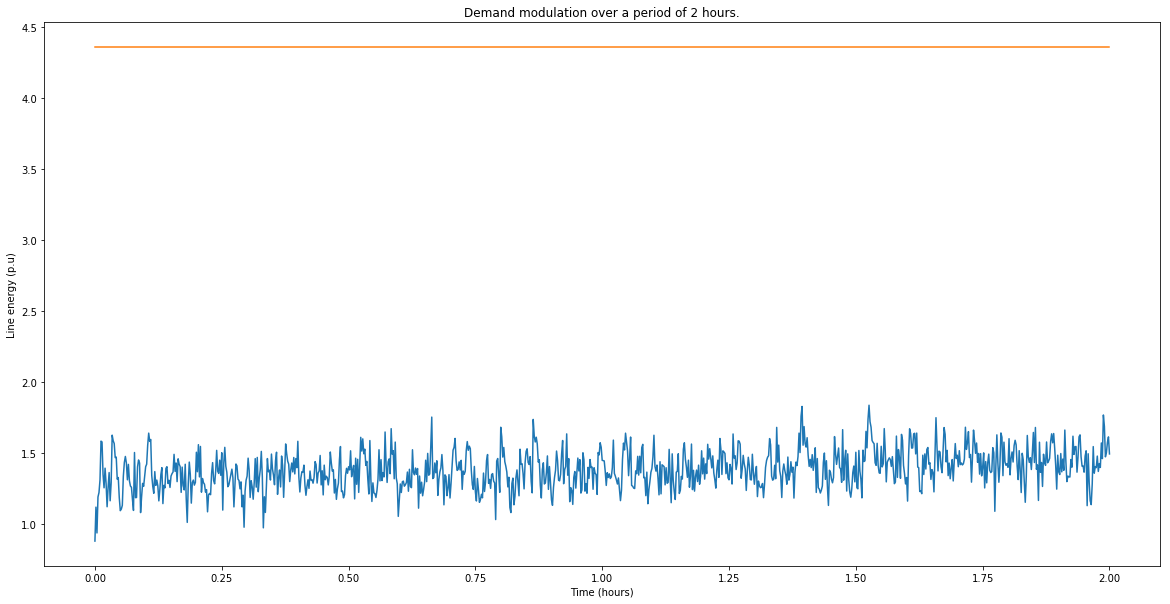

In [5]:
threshold_val = 4.3575

fig = plt.figure(figsize = (20, 10))
time = np.linspace(0, 2.0, le.shape[1])
threshold = threshold_val * np.ones(le.shape[1])


#for i in range(le.shape[0]):
#    plt.plot(time, le[i], label = ("Line %i" % (i)))

plt.plot(time, le[160])
plt.plot(time, threshold)

plt.xlabel('Time (hours)')
plt.ylabel('Line energy (p.u)')
plt.title('Demand modulation over a period of 2 hours.')
#plt.savefig('line_modulation.png')
#plt.legend()
max(le[160])

(1001,)


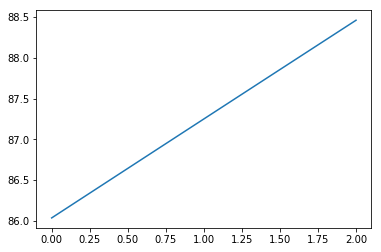

In [7]:
se = np.loadtxt('test/test1/served_energy.0')
print se.shape
plt.plot(time, se)